In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
# Normalize pixel values (0-255) to range (0-1) for better training stability
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define class names for visualization
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [5]:
# Function to display a few sample images from the training dataset
def plot_sample_images():
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i])  # Display image
        ax.set_title(class_names[y_train[i][0]])  # Show class label
        ax.axis('off')  # Hide axis labels
    plt.show()

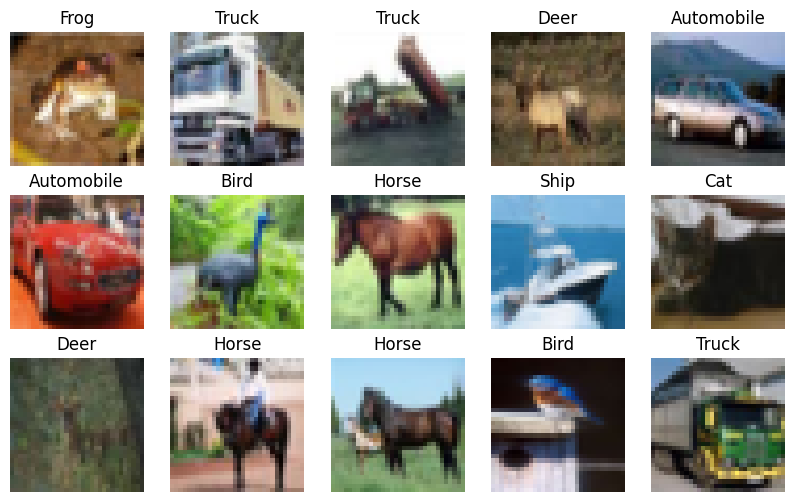

In [6]:
plot_sample_images()

In [7]:
# Define the CNN model structure
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),  # Normalize feature maps to improve stability
        layers.MaxPooling2D((2,2)),  # Reduce spatial size, retain important features
        layers.Dropout(0.2),  # Prevent overfitting

        # Second Convolutional Block
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # Third Convolutional Block
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        # Fully Connected Layers
        layers.Flatten(),  # Flatten 3D feature maps to 1D
        layers.Dense(256, activation='relu'),  # Fully connected layer
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    return model

In [8]:
# Create the CNN model
model = create_cnn_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model using Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model on the dataset for 20 epochs with batch size of 64
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3393 - loss: 2.0861 - val_accuracy: 0.5569 - val_loss: 1.2081
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5527 - loss: 1.2402 - val_accuracy: 0.6007 - val_loss: 1.1490
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6166 - loss: 1.0756 - val_accuracy: 0.6231 - val_loss: 1.0546
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6582 - loss: 0.9728 - val_accuracy: 0.6944 - val_loss: 0.8706
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6827 - loss: 0.9043 - val_accuracy: 0.6681 - val_loss: 0.9311
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6925 - loss: 0.8713 - val_accuracy: 0.6003 - val_loss: 1.1881
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7117 - loss: 0.8241 - val_accuracy: 0.7294 - val_loss: 0.7668
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7237 - loss: 0.7983 - val_accuracy:

In [11]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy over epochs
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('CNN Training Performance')

    # Plot loss over epochs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('CNN Loss Curve')

    plt.show()

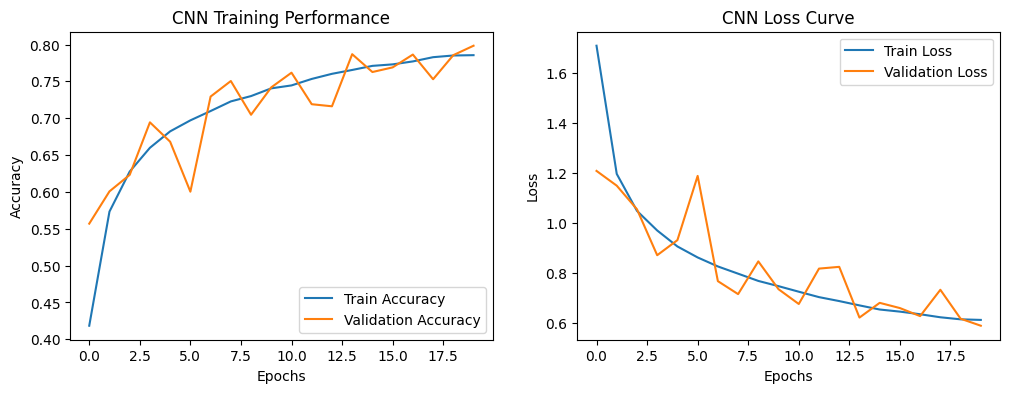

In [12]:
plot_training_history(history)

In [13]:
# Evaluate the model on the test set to check final accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7984 - loss: 0.5884
Test Accuracy: 0.7984


In [14]:
# Function to visualize model predictions
def plot_predictions():
    predictions = model.predict(x_test[:10])  # Get predictions for first 10 test images

    fig, axes = plt.subplots(2, 5, figsize=(12, 5))  # Create grid for visualization
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_test[i])  # Display image
        pred_label = class_names[np.argmax(predictions[i])]  # Get predicted class name
        true_label = class_names[y_test[i][0]]  # Get actual class name
        ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")  # Show prediction
        ax.axis('off')  # Hide axis labels
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step


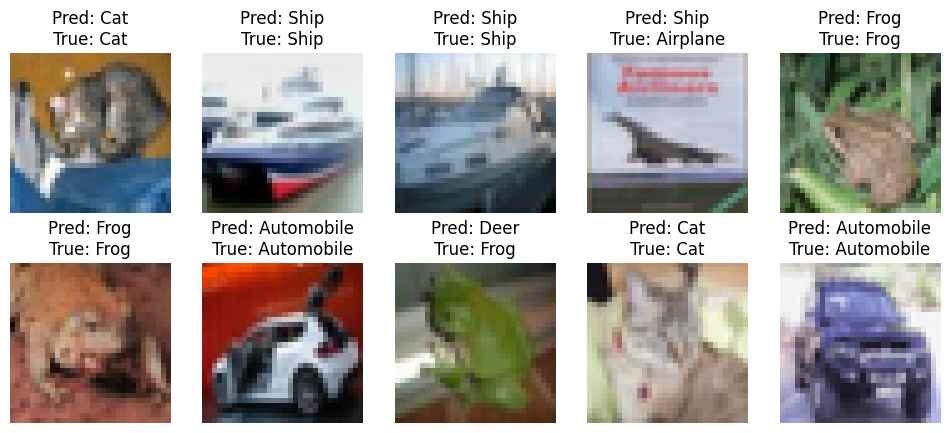

In [15]:
plot_predictions()